In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#load train and test files
train = pd.read_csv('train_BRCpofr.csv')
test = pd.read_csv('test_koRSKBP.csv')

In [4]:
print(train.shape, test.shape)

(89392, 12) (59595, 11)


In [5]:
train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [6]:
train[['claim_amount', 'cltv']].describe()

,claim_amount,cltv
count,89392.000000,89392.000000
mean,4351.502416,97952.828978
std,3262.359775,90613.814793
min,0.000000,24828.000000
25%,2406.000000,52836.000000
50%,4089.000000,66396.000000
75%,6094.000000,103440.000000
max,31894.000000,724068.000000


<AxesSubplot:xlabel='claim_amount', ylabel='Count'>

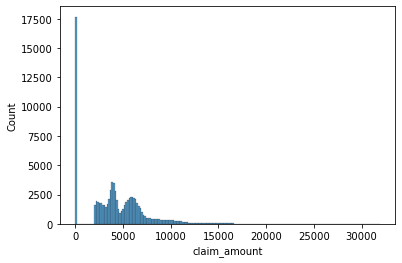

In [7]:
sns.histplot((train.claim_amount))

<AxesSubplot:xlabel='cltv', ylabel='Count'>

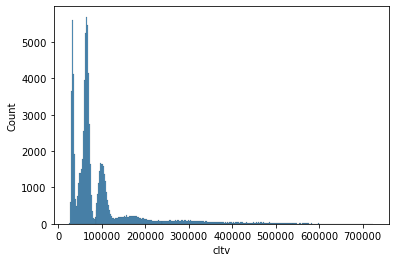

In [8]:
sns.histplot((train.cltv))

In [9]:
train.policy.unique()

array(['A', 'C', 'B'], dtype=object)

In [10]:
train.type_of_policy.unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

In [11]:
train.nunique()

id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

In [12]:
train.vintage.unique()

array([5, 8, 7, 6, 1, 0, 3, 4, 2], dtype=int64)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [14]:
 for col in train.select_dtypes(['object']).columns:
        print(col, train[col].unique())

gender ['Male' 'Female']
area ['Urban' 'Rural']
qualification ['Bachelor' 'High School' 'Others']
income ['5L-10L' 'More than 10L' '2L-5L' '<=2L']
num_policies ['More than 1' '1']
policy ['A' 'C' 'B']
type_of_policy ['Platinum' 'Gold' 'Silver']


In [15]:
qualification_dict = {'Others': 0,'High School':1, 'Bachelor': 2}
income_dict = {'<=2L': 0,  '2L-5L':1, '5L-10L':2,  'More than 10L' :3 }
num_policies_dict =  {'1': 0,'More than 1': 1 }
type_of_policy_dict = { 'Silver': 0,  'Gold' : 1 , 'Platinum': 2}

In [16]:
train.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [17]:
def label_df(df):
    qualification_dict = {'Others': 0,'High School':1, 'Bachelor': 2}
    income_dict = {'<=2L': 0,  '2L-5L':1, '5L-10L':2,  'More than 10L' :3 }
    num_policies_dict =  {'1': 0,'More than 1': 1 }
    type_of_policy_dict = { 'Silver': 0,  'Gold' : 1 , 'Platinum': 2}
    
    df['qualification'] = df['qualification'].map(qualification_dict)
    df['income'] = df['income'].map(income_dict)
    df['num_policies'] = df['num_policies'].map(num_policies_dict)
    df['type_of_policy'] =  df['type_of_policy'].map(type_of_policy_dict)   
    
    return df

label_df(train)

label_df(test)

In [20]:
train = pd.get_dummies(train, drop_first = True)

In [21]:
test  = pd.get_dummies(test, drop_first = True)

In [22]:
train_features = train.drop(['id', 'cltv'], axis = 'columns')

In [23]:
train_target = train['cltv']

In [24]:
test_features = test.drop(['id'], axis = 'columns')

In [26]:
from flaml import AutoML

In [27]:
automl = AutoML()

In [29]:
automl.fit(train_features, train_target, metric = 'r2', task = 'regression', time_budget= -1, n_splits=5)

[flaml.automl.automl: 01-21 11:17:56] {2715} INFO - task = regression
[flaml.automl.automl: 01-21 11:17:56] {2717} INFO - Data split method: uniform
[flaml.automl.automl: 01-21 11:17:56] {2720} INFO - Evaluation method: cv
[flaml.automl.automl: 01-21 11:17:56] {2847} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 01-21 11:17:56] {2897} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. Zero-shot AutoML is used for certain tasks and estimators. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl.automl: 01-21 11:17:56] {2993} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 01-21 11:17:56] {3322} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 01-21 11:17:57] {3460} INFO - Estimated sufficient time budget=10000s. Estimated necessary time budget=10s.
[flaml.automl.automl:

In [30]:
automl.best_config

{'n_estimators': 1899,
 'max_leaves': 59,
 'min_child_weight': 0.013389019900720164,
 'learning_rate': 0.0028943401472847964,
 'subsample': 0.7808944208233943,
 'colsample_bylevel': 1.0,
 'colsample_bytree': 0.9999355357362375,
 'reg_alpha': 0.7905117773932878,
 'reg_lambda': 2.916897119216104}

In [31]:
automl.best_config_per_estimator

{'lgbm': {},
 'rf': {'n_estimators': 2047,
  'max_features': 0.6683903035731481,
  'max_leaves': 591,
  'criterion': 'entropy'},
 'xgboost': {'n_estimators': 1899,
  'max_leaves': 59,
  'min_child_weight': 0.013389019900720164,
  'learning_rate': 0.0028943401472847964,
  'subsample': 0.7808944208233943,
  'colsample_bylevel': 1.0,
  'colsample_bytree': 0.9999355357362375,
  'reg_alpha': 0.7905117773932878,
  'reg_lambda': 2.916897119216104},
 'extra_tree': {'n_estimators': 346,
  'max_features': 1.0,
  'max_leaves': 1007,
  'criterion': 'entropy'},
 'xgb_limitdepth': {'n_estimators': 544,
  'max_depth': 12,
  'min_child_weight': 79.32555867011985,
  'learning_rate': 0.010128107120014433,
  'subsample': 0.9799974977817297,
  'colsample_bylevel': 0.881815418056542,
  'colsample_bytree': 0.9718556912196423,
  'reg_alpha': 72.63148950428749,
  'reg_lambda': 1.4601415712058006}}

In [32]:
automl.best_estimator

'xgboost'

In [33]:
automl.feature_importances_

array([0.00646183, 0.0069956 , 0.01016835, 0.00672082, 0.01482515,
       0.892872  , 0.00685378, 0.00693622, 0.02575521, 0.01141423,
       0.01099701], dtype=float32)

Text(0.5, 1.0, 'Feature Importance')

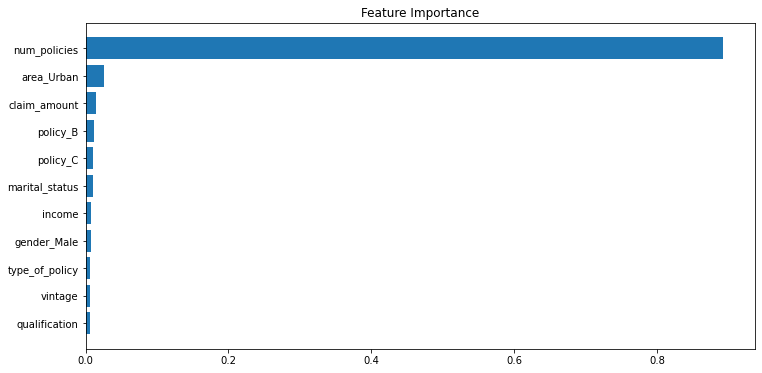

In [34]:
import numpy as np
feature_importance = automl.feature_importances_
sorted_idx = np.argsort(feature_importance)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(train_features.columns)[sorted_idx])
plt.title('Feature Importance')

In [43]:
automl.feature_importances_

array([0.00646183, 0.0069956 , 0.01016835, 0.00672082, 0.01482515,
       0.892872  , 0.00685378, 0.00693622, 0.02575521, 0.01141423,
       0.01099701], dtype=float32)

In [35]:
automl.time_to_find_best_model

256.8864438533783

In [38]:
predictions = automl.predict(test_features)

In [39]:
submission = test[['id']].copy()
submission['cltv'] = predictions
submission.to_csv('sub_flaml_1.csv',index = False)

## Log Model 

In [49]:
train_log_features = train_features.copy()
train_log_features['claim_amount'] = np.log(train_log_features['claim_amount'] + 1)
train_log_target = train_target.copy()
train_log_target = np.log(train_log_target)
test_log_features = test_features.copy()
test_log_features['claim_amount'] = np.log(test_log_features['claim_amount'] + 1)

In [53]:
from flaml import AutoML

In [54]:
automl_log = AutoML()

In [55]:
automl_log.fit(train_log_features, train_log_target, metric = 'r2', task = 'regression', time_budget= -1, n_splits=5)

[flaml.automl.automl: 01-21 11:59:13] {2715} INFO - task = regression
[flaml.automl.automl: 01-21 11:59:13] {2717} INFO - Data split method: uniform
[flaml.automl.automl: 01-21 11:59:13] {2720} INFO - Evaluation method: cv
[flaml.automl.automl: 01-21 11:59:13] {2847} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 01-21 11:59:13] {2897} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. Zero-shot AutoML is used for certain tasks and estimators. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl.automl: 01-21 11:59:13] {2993} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 01-21 11:59:13] {3322} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 01-21 11:59:15] {3460} INFO - Estimated sufficient time budget=10000s. Estimated necessary time budget=10s.
[flaml.automl.automl:

In [56]:
predictions_log = np.exp(automl_log.predict(test_log_features))
submission = test[['id']].copy()
submission['cltv'] = predictions_log
submission.to_csv('sub_flaml_log_1.csv',index = False)

## Average prediction Model (0.5,0.5)

In [59]:
submission = test[['id']].copy()
submission['cltv'] = 0.5 * predictions_log + 0.5 * predictions
submission.to_csv('sub_flaml_0.5_weight_1.csv',index = False)

# Model 4

In [64]:
automl2 = AutoML()

In [74]:
automl2.fit(train.drop(['cltv'], axis = 'columns'), train['cltv'], metric = 'r2', task = 'regression', time_budget= -1, n_splits=5 )

[flaml.automl.automl: 01-21 14:12:40] {2715} INFO - task = regression
[flaml.automl.automl: 01-21 14:12:40] {2717} INFO - Data split method: uniform
[flaml.automl.automl: 01-21 14:12:40] {2720} INFO - Evaluation method: cv
[flaml.automl.automl: 01-21 14:12:40] {2847} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 01-21 14:12:40] {2897} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. Zero-shot AutoML is used for certain tasks and estimators. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl.automl: 01-21 14:12:40] {2993} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 01-21 14:12:40] {3322} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 01-21 14:12:42] {3460} INFO - Estimated sufficient time budget=10000s. Estimated necessary time budget=10s.
[flaml.automl.automl:

In [75]:
submission = test[['id']].copy()
submission['cltv'] = automl2.predict(test)
submission.to_csv('sub_flaml_4.csv',index = False)

# Model 5

In [76]:
automl3 = AutoML()
automl2.fit(train.drop(['id','cltv'], axis = 'columns'), train['cltv'],
            metric = 'r2', task = 'regression', time_budget= -1, n_splits=5 )
submission = test[['id']].copy()
submission['cltv'] = automl2.predict(test.drop(['id'], axis = 'columns'))
submission.to_csv('sub_flaml_5.csv',index = False)

[flaml.automl.automl: 01-21 14:21:30] {2715} INFO - task = regression
[flaml.automl.automl: 01-21 14:21:30] {2717} INFO - Data split method: uniform
[flaml.automl.automl: 01-21 14:21:30] {2720} INFO - Evaluation method: cv
[flaml.automl.automl: 01-21 14:21:30] {2847} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 01-21 14:21:30] {2897} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. Zero-shot AutoML is used for certain tasks and estimators. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl.automl: 01-21 14:21:30] {2993} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 01-21 14:21:30] {3322} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 01-21 14:21:32] {3460} INFO - Estimated sufficient time budget=10000s. Estimated necessary time budget=10s.
[flaml.automl.automl: